In [226]:
# Install core libraries for data analysis and ML
!pip install numpy scikit-learn matplotlib seaborn --quiet

!pip install fastparquet
!pip install --upgrade pandas pyarrow




[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Configure display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [228]:
import pandas as pd

data_path = "data/frames/kepler_summary_with_labels.jsonl"

# JSONL = one JSON object per line
df = pd.read_json(data_path, lines=True)

print(f"✅ Loaded successfully! Rows: {len(df)}, Columns: {df.shape[1]}")
df.head()


✅ Loaded successfully! Rows: 50649, Columns: 59


,star_id,targettype,field,quarter,ra,dec,pm_ra,pm_dec,pm_total,gal_lat,gal_lon,start_time,end_time,umag,gmag,rmag,imag,zmag,gredmag,d51mag,jmag,hmag,kmag,kepmag,filter,npts,gkcolor,grcolor,jkcolor,reddening,extinction,eff_temp,surface_gravity,metallicity,radius,object_status,file_version,data_release,exposure,livetime,cdpp3_0,cdpp6_0,cdpp12_0,crowdsap,flfrcsap,pdcmethod,pdcvar,pdc_tot,pdc_totp,pdc_cor,pdc_corp,pdc_var,pdc_varp,pdc_noi,pdc_noip,pdc_ept,pdc_eptp,kepid,label
0,10000490,long cadence,The Kepler Field,0,286.555989,46.957341,0.0,0.0,0.0,17.102994,77.482026,120.529000,130.255731,NaN,11.539,11.236,NaN,NaN,NaN,NaN,10.623,10.471,10.425,11.244,Kepler band pass,476,1.114,0.303,0.198,NaN,NaN,6714.0,4.033,-0.08,1.906,4,6.1,25,8.954768,8.954768,88.5,84.0,75.5,0.9992,0.9794,regularMap,67.8812,0.8734,5.01,0.9909,76.77,0.9999,70.12,0.9999,97.66,NaN,NaN,10000490,FALSE POSITIVE
1,10000490,long cadence,The Kepler Field,1,286.555989,46.957341,0.0,0.0,0.0,17.102994,77.482026,131.502223,164.993863,NaN,11.539,11.236,NaN,NaN,NaN,NaN,10.623,10.471,10.425,11.244,Kepler band pass,1639,1.114,0.303,0.198,NaN,NaN,6714.0,4.033,-0.08,1.906,4,6.1,25,30.833573,30.833573,113.4,108.4,107.7,0.9992,0.9806,regularMap,134.8152,0.9989,98.33,0.9987,85.27,0.9999,88.07,0.9972,99.07,NaN,NaN,10000490,FALSE POSITIVE
2,10000490,long cadence,The Kepler Field,13,286.555989,46.957341,0.0,0.0,0.0,17.102994,77.482026,1182.726994,1273.066905,NaN,11.539,11.236,NaN,NaN,NaN,NaN,10.623,10.471,10.425,11.244,Kepler band pass,4421,1.114,0.303,0.198,NaN,NaN,6714.0,4.033,-0.08,1.906,4,6.1,25,83.170077,83.170077,191.8,187.5,180.0,0.9992,0.9803,multiScaleMap,42.5528,0.6728,0.90,0.9995,73.03,0.8910,5.75,0.8328,30.48,1.0,52.94,10000490,FALSE POSITIVE
3,10000490,long cadence,The Kepler Field,14,286.555989,46.957341,0.0,0.0,0.0,17.102994,77.482026,1274.129471,1371.332126,NaN,11.539,11.236,NaN,NaN,NaN,NaN,10.623,10.471,10.425,11.244,Kepler band pass,4757,1.114,0.303,0.198,NaN,NaN,6714.0,4.033,-0.08,1.906,4,6.1,25,89.488158,89.488158,253.7,187.5,180.0,1.0000,0.9803,multiScaleMap,92.8295,0.6306,1.35,0.9995,80.80,0.8636,2.09,0.9295,90.61,1.0,75.59,10000490,FALSE POSITIVE
4,10000490,long cadence,The Kepler Field,15,286.555989,46.957341,0.0,0.0,0.0,17.102994,77.482026,1373.477575,1471.146988,NaN,11.539,11.236,NaN,NaN,NaN,NaN,10.623,10.471,10.425,11.244,Kepler band pass,4780,1.114,0.303,0.198,NaN,NaN,6714.0,4.033,-0.08,1.906,4,6.1,25,89.917873,89.917873,253.7,229.3,211.1,1.0000,0.9663,regularMap,65.7252,0.6403,1.09,0.9990,69.87,0.9993,85.82,0.9998,99.70,1.0,54.44,10000490,FALSE POSITIVE


In [229]:
df['label'].value_counts()

label
FALSE POSITIVE    28415
CONFIRMED         13388
CANDIDATE          8846
Name: count, dtype: int64

In [230]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50649 entries, 0 to 50648
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   star_id          50649 non-null  int64  
 1   targettype       50649 non-null  object 
 2   field            50649 non-null  object 
 3   quarter          50649 non-null  int64  
 4   ra               50649 non-null  float64
 5   dec              50649 non-null  float64
 6   pm_ra            50521 non-null  float64
 7   pm_dec           50521 non-null  float64
 8   pm_total         50521 non-null  float64
 9   gal_lat          50649 non-null  float64
 10  gal_lon          50649 non-null  float64
 11  start_time       50649 non-null  float64
 12  end_time         50649 non-null  float64
 13  umag             0 non-null      float64
 14  gmag             50434 non-null  float64
 15  rmag             50623 non-null  float64
 16  imag             49829 non-null  float64
 17  zmag        

star_id                0
targettype             0
field                  0
quarter                0
ra                     0
dec                    0
pm_ra                128
pm_dec               128
pm_total             128
gal_lat                0
gal_lon                0
start_time             0
end_time               0
umag               50649
gmag                 215
rmag                  26
imag                 820
zmag                2936
gredmag            50649
d51mag              3375
jmag                 126
hmag                 126
kmag                 126
kepmag                12
filter                 0
npts                   0
gkcolor              341
grcolor              229
jkcolor              126
reddening           2903
extinction          2903
eff_temp             459
surface_gravity      459
metallicity          459
radius               459
object_status          0
file_version           0
data_release           0
exposure               0
livetime               0


In [231]:
# Keep only CONFIRMED and FALSE POSITIVE rows
df_filtered = df[df['label'].isin(['CONFIRMED', 'FALSE POSITIVE'])].copy()

# Check how many rows remain
print("Remaining rows:", len(df_filtered))
print(df_filtered['label'].value_counts())

df_filtered['label'] = df_filtered['label'].map({
    'CONFIRMED': 1,
    'FALSE POSITIVE': 0
})


Remaining rows: 41803
label
FALSE POSITIVE    28415
CONFIRMED         13388
Name: count, dtype: int64


In [232]:
keep_cols = [
    # --- Positional / Spatial ---
    "ra", "dec", "gal_lat", "gal_lon",

    # --- Photometric magnitudes (brightness) ---
    "gmag", "rmag", "imag", "zmag",
    "jmag", "hmag", "kmag", "kepmag",

    # --- Stellar parameters ---
    "eff_temp",          # Effective temperature
    "surface_gravity",   # log(g)
    "metallicity",       # [Fe/H]
    "radius",            # Stellar radius

    # --- Motion / kinematics ---
    "pm_ra", "pm_dec", "pm_total",  # proper motion

    # --- Noise and crowding metrics ---
    "cdpp3_0", "cdpp6_0", "cdpp12_0",  # Combined Differential Photometric Precision
    "crowdsap", "flfrcsap",            # crowding / contamination factors

    # --- PDC (Pre-search Data Conditioning) metrics ---
    "pdcvar", "pdc_tot", "pdc_cor",
    "pdc_var", "pdc_noi",

    # --- Observing information ---
    "quarter", "npts", "reddening", "extinction",

    # --- Colors (can indicate star type) ---
    "gkcolor", "grcolor", "jkcolor",
]

keep_cols = [
    # --- Basic identifiers (optional for traceability) ---
    "label",

    # --- Astrometric / spatial position ---
    # "ra", "dec", 
    # "gal_lat", "gal_lon",
    # "pm_ra", "pm_dec", "pm_total",   # proper motion info

    # --- Photometric magnitudes (raw, from catalog) ---
    # "gmag", "rmag", "imag", "zmag",  # optical
    # "jmag", "hmag", "kmag",          # infrared (2MASS)
    # "kepmag",                        # Kepler magnitude

    # --- Stellar physical parameters (from KIC/EPIC) ---
    "eff_temp",          # effective temperature
    "surface_gravity",   # log(g)
    "metallicity",       # [Fe/H]
    "radius",            # stellar radius
    "reddening",         # interstellar reddening E(B–V)
    "extinction",        # total extinction Av

    # # --- Derived but standardized catalog colors ---
    # "gkcolor", "grcolor", "jkcolor",

    # --- Observation metadata that might still correlate with quality ---
    "npts",              # number of cadence points
]


In [233]:
df_binary = df_filtered[keep_cols].copy()

print("✅ Clean dataset shape:", df_binary.shape)
df_binary.head()

✅ Clean dataset shape: (41803, 8)


,label,eff_temp,surface_gravity,metallicity,radius,reddening,extinction,npts
0,0,6714.0,4.033,-0.08,1.906,NaN,NaN,476
1,0,6714.0,4.033,-0.08,1.906,NaN,NaN,1639
2,0,6714.0,4.033,-0.08,1.906,NaN,NaN,4421
3,0,6714.0,4.033,-0.08,1.906,NaN,NaN,4757
4,0,6714.0,4.033,-0.08,1.906,NaN,NaN,4780


In [234]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # We'll visualize a few features at a time to avoid clutter
# numeric_cols = df_binary.drop(columns=['label']).select_dtypes(include=['float64', 'int64']).columns

# # Configure plot style
# sns.set(style="whitegrid", palette="muted", color_codes=True)

# # Plot each feature
# for col in numeric_cols:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x='label', y=col, data=df_binary)
#     plt.title(f'Boxplot of {col} by Label (0=False Positive, 1=Confirmed)')
#     plt.xlabel("Label")
#     plt.ylabel(col)
#     plt.tight_layout()
#     plt.show()

In [235]:
# Separate target and features
X = df_binary.drop(columns=['label'])
y = df_binary['label']

print("✅ Features shape:", X.shape)
print("✅ Target shape:", y.shape)

# Quick check
X.head()

✅ Features shape: (41803, 7)
✅ Target shape: (41803,)


,eff_temp,surface_gravity,metallicity,radius,reddening,extinction,npts
0,6714.0,4.033,-0.08,1.906,NaN,NaN,476
1,6714.0,4.033,-0.08,1.906,NaN,NaN,1639
2,6714.0,4.033,-0.08,1.906,NaN,NaN,4421
3,6714.0,4.033,-0.08,1.906,NaN,NaN,4757
4,6714.0,4.033,-0.08,1.906,NaN,NaN,4780


In [236]:
# missing_summary = df_binary.isnull().mean().sort_values(ascending=False)
# missing_summary[missing_summary > 0]

In [237]:
df_binary = df_binary.fillna(df_binary.median(numeric_only=True))
df_binary.isnull().sum().sum()

np.int64(0)

In [238]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Select only numeric columns (non-numeric can't be correlated directly)
# df_num = df_binary.select_dtypes(include=['number'])

# # Compute correlation matrix
# corr = df_num.corr()

# # Plot
# plt.figure(figsize=(16, 12))
# sns.heatmap(
#     corr,
#     cmap="coolwarm",
#     center=0,
#     square=True,
#     linewidths=0.5,
#     cbar_kws={"shrink": 0.6},
# )
# plt.title("🔍 Correlation Heatmap — df_binary", fontsize=16)
# plt.show()


In [239]:
# Separate target and features
X = df_binary.drop(columns=['label'])
y = df_binary['label']

print("✅ Features:", X.shape, " Target:", y.shape)

# Quick check
X.head()

✅ Features: (41803, 7)  Target: (41803,)


,eff_temp,surface_gravity,metallicity,radius,reddening,extinction,npts
0,6714.0,4.033,-0.08,1.906,0.115,0.356,476
1,6714.0,4.033,-0.08,1.906,0.115,0.356,1639
2,6714.0,4.033,-0.08,1.906,0.115,0.356,4421
3,6714.0,4.033,-0.08,1.906,0.115,0.356,4757
4,6714.0,4.033,-0.08,1.906,0.115,0.356,4780


In [240]:
from sklearn.model_selection import train_test_split

# Step 1 — Split into training+validation vs test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")


Train: (33442, 7)
Test: (8361, 7)


In [241]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   
X_train_scaled = X_train #scaler.fit_transform(X_train)
X_test_scaled = X_test #scaler.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(33442, 7) (8361, 7)


In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 1000),        # number of trees
    'max_depth': [None, 5, 15, 30],        # depth of each tree
    'min_samples_split': randint(2, 10),       # minimum samples to split a node
    'min_samples_leaf': randint(1, 10),        # minimum samples in a leaf
    'max_features': ['sqrt', 'log2', None],    # features considered at each split
    'bootstrap': [True, False]                 # whether to use bootstrap samples
}

# Randomized Search setup
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,                # number of random combinations to try
    cv=3,                     # 3-fold cross-validation
    scoring='accuracy',       # metric to optimize
    verbose=1,
    random_state=42,
    n_jobs=-1                 # use all CPU cores
)

# Fit the search
rf_random.fit(X_train_scaled, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best Cross-Validation Score:", rf_random.best_score_)

# Evaluate best model on test set
best_rf = rf_random.best_estimator_
y_test_pred = best_rf.predict(X_test_scaled)
from sklearn.metrics import classification_report
print("Test Performance:\n", classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 847}
Best Cross-Validation Score: 0.9951258752850468
Test Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       1.00      0.99      1.00      2678

    accuracy                           1.00      8361
   macro avg       1.00      1.00      1.00      8361
weighted avg       1.00      1.00      1.00      8361



Test Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       1.00      1.00      1.00      2678

    accuracy                           1.00      8361
   macro avg       1.00      1.00      1.00      8361
weighted avg       1.00      1.00      1.00      8361



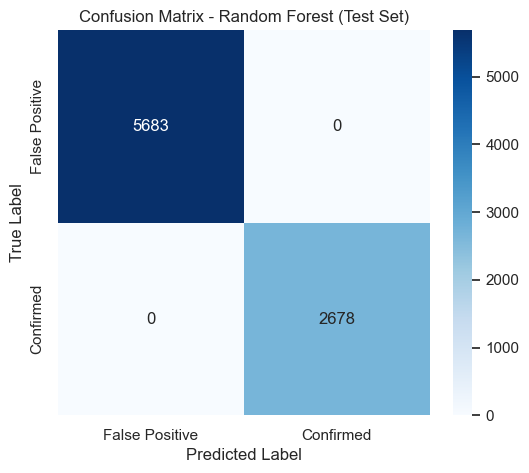

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

y_test_pred = best_rf.predict(X_test_scaled)
print("Test Performance:\n", classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

# Option 1: Using Seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()

Baseline Accuracy with ALL features: 1.0000
Test Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       1.00      1.00      1.00      2678

    accuracy                           1.00      8361
   macro avg       1.00      1.00      1.00      8361
weighted avg       1.00      1.00      1.00      8361



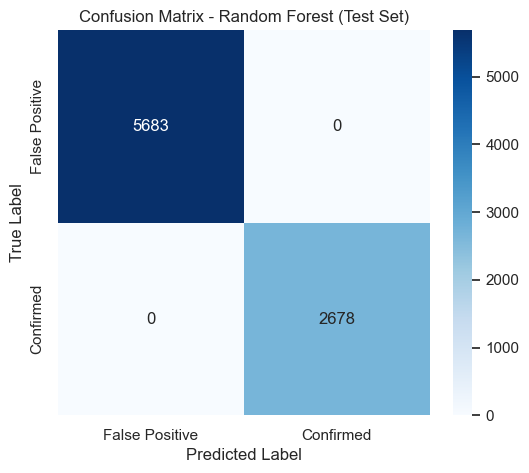

In [56]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=6,
    min_samples_split=6,
    n_estimators=847,
    random_state=42
)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
baseline_acc = accuracy_score(y_test, y_pred)

print(f"Baseline Accuracy with ALL features: {baseline_acc:.4f}")

y_test_pred = rf.predict(X_test_scaled)
print("Test Performance:\n", classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

# Option 1: Using Seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()

Threshold=0.20  Recall(Confirmed)=1.000  Accuracy=0.760
Threshold=0.22  Recall(Confirmed)=1.000  Accuracy=0.795
Threshold=0.24  Recall(Confirmed)=1.000  Accuracy=0.827
Threshold=0.26  Recall(Confirmed)=0.999  Accuracy=0.857
Threshold=0.28  Recall(Confirmed)=0.998  Accuracy=0.889
Threshold=0.30  Recall(Confirmed)=0.994  Accuracy=0.909
Threshold=0.32  Recall(Confirmed)=0.975  Accuracy=0.918
Threshold=0.34  Recall(Confirmed)=0.960  Accuracy=0.925
Threshold=0.36  Recall(Confirmed)=0.941  Accuracy=0.928
Threshold=0.38  Recall(Confirmed)=0.925  Accuracy=0.933
Threshold=0.40  Recall(Confirmed)=0.912  Accuracy=0.935
Threshold=0.42  Recall(Confirmed)=0.897  Accuracy=0.941
Threshold=0.44  Recall(Confirmed)=0.881  Accuracy=0.941
Threshold=0.46  Recall(Confirmed)=0.869  Accuracy=0.944
Threshold=0.48  Recall(Confirmed)=0.845  Accuracy=0.939
Threshold=0.50  Recall(Confirmed)=0.827  Accuracy=0.937
Threshold=0.52  Recall(Confirmed)=0.790  Accuracy=0.928
Threshold=0.54  Recall(Confirmed)=0.760  Accurac

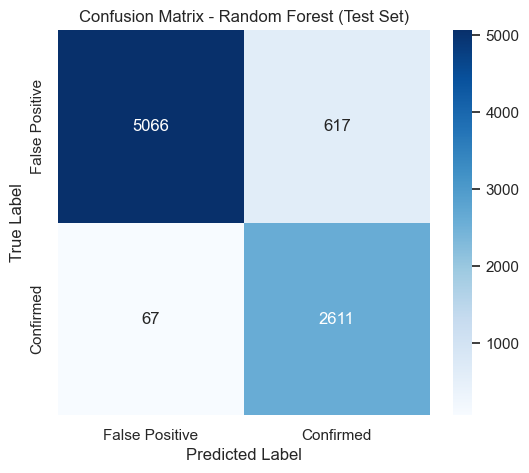

In [53]:
import numpy as np
from sklearn.metrics import (
    recall_score, precision_score, accuracy_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

y_prob = rf.predict_proba(X_test)[:, 1]

best_thr, best_recall, best_acc = 0.5, 0.0, 0.0

for thr in np.arange(0.2, 1, 0.02):
    y_thr = (y_prob > thr).astype(int)
    rec = recall_score(y_test, y_thr, pos_label=1)
    acc = accuracy_score(y_test, y_thr)
    print(f"Threshold={thr:.2f}  Recall(Confirmed)={rec:.3f}  Accuracy={acc:.3f}")

    # choose threshold that gives highest recall while keeping accuracy >= 0.91
    if (rec > best_recall) and (acc >= 0.91):
        best_recall, best_thr, best_acc = rec, thr, acc

print(f"\n🚀 Best threshold={best_thr:.2f}  Recall={best_recall:.3f}  Accuracy={best_acc:.3f}")

# final predictions
y_best = (y_prob > best_thr).astype(int)

print("\nFinal report with tuned threshold:\n", classification_report(y_test, y_best))

# text confusion matrix
cm = confusion_matrix(y_test, y_best)
print("\nConfusion Matrix:\n", cm)

# labeled confusion matrix
import pandas as pd
cm_df = pd.DataFrame(
    cm,
    index=['Actual False Positive', 'Actual Confirmed'],
    columns=['Predicted False Positive', 'Predicted Confirmed']
)
print("\nConfusion Matrix (labeled):")
print(cm_df)

# optional heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()


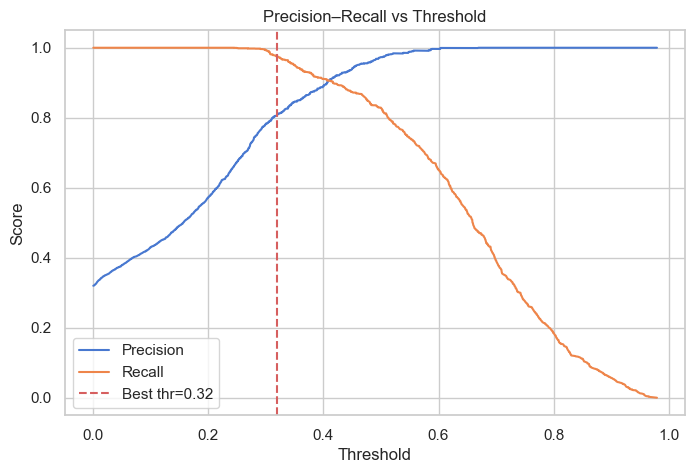

In [52]:
from sklearn.metrics import precision_recall_curve
prec, rec, thr = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,5))
plt.plot(thr, prec[:-1], label='Precision')
plt.plot(thr, rec[:-1], label='Recall')
plt.axvline(best_thr, color='r', ls='--', label=f'Best thr={best_thr:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision–Recall vs Threshold')
plt.legend()
plt.show()


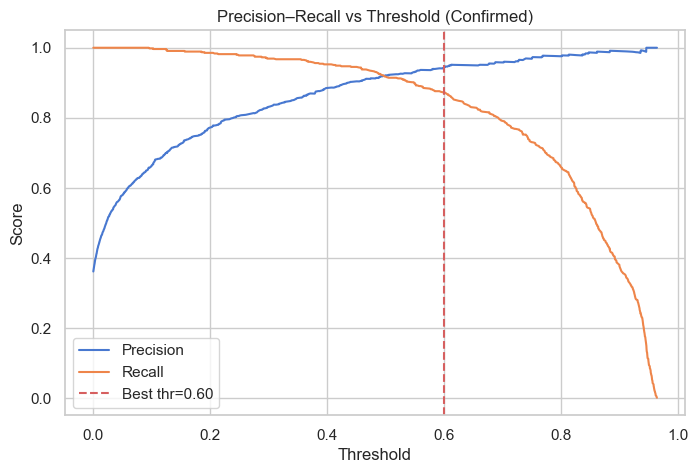

In [ ]:
# Precision–Recall for Confirmed (class 1)
prec, rec, thr = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,5))
plt.plot(thr, prec[:-1], label='Precision')
plt.plot(thr, rec[:-1], label='Recall')
plt.axvline(best_thr, color='r', ls='--', label=f'Best thr={best_thr:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision–Recall vs Threshold (Confirmed)')
plt.legend()
plt.show()


In [ ]:
!pip install tensorflow

In [188]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build model architecture
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,465 (56.50 KB)

 Trainable params: 14,465 (56.50 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,   # part of train data used for validation
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8179 - loss: 0.3922 - val_accuracy: 0.8410 - val_loss: 0.3476
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8692 - loss: 0.3061 - val_accuracy: 0.8591 - val_loss: 0.3263
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.8727 - loss: 0.2863 - val_accuracy: 0.8633 - val_loss: 0.3189
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.8863 - loss: 0.2739 - val_accuracy: 0.8666 - val_loss: 0.3019
Epoch 5/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.8900 - loss: 0.2619 - val_accuracy: 0.8773 - val_loss: 0.3042
Epoch 6/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8925 - loss: 0.2665 - val_accuracy: 0.8690 - val_loss: 0.2915
Epoch 7/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8958 - loss: 0.2588 - val_accuracy: 0.8773 - val_loss: 0.2919
Epoch 8/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.8999 - loss: 0.2

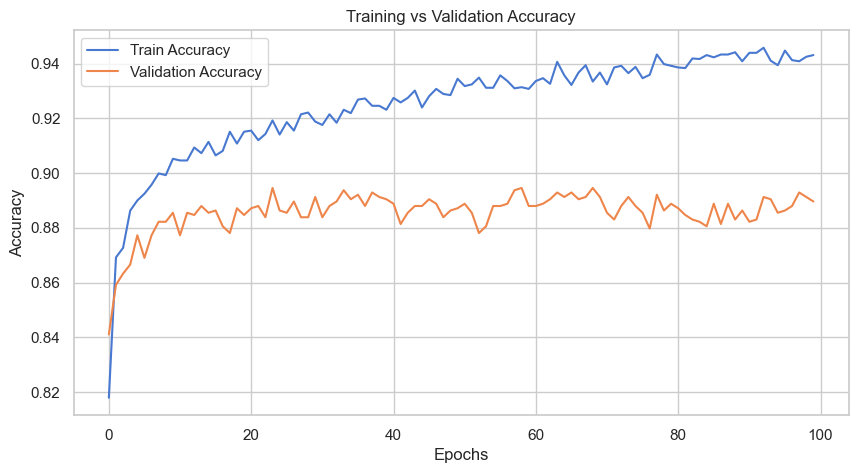

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [191]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np

# 🔹 1. Get predicted probabilities for the test set
y_pred_prob = model.predict(X_test_scaled)

# 🔹 2. Convert probabilities to binary class predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# 🔹 3. Print classification report
print("🧾 Test Set Performance:")
print(classification_report(y_test, y_pred))

# 🔹 4. Print overall accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc:.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
🧾 Test Set Performance:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       968
           1       0.87      0.86      0.87       549

    accuracy                           0.90      1517
   macro avg       0.90      0.89      0.89      1517
weighted avg       0.90      0.90      0.90      1517

✅ Test Accuracy: 0.9031


In [192]:
!pip install keras-tuner --quiet


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [193]:
import keras_tuner as kt
from tensorflow.keras import layers, models

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    
    # Tune number of hidden layers and neurons
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        # Tune dropout rate
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Tune learning rate for Adam
    lr = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [196]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,          # number of combinations to try
    executions_per_trial=1, # train each combo once
    directory='tuner_dir',
    project_name='exoplanet_dl_tuning'
)
tuner.results_summary()


Results summary
Results in tuner_dir/exoplanet_dl_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")


In [ ]:
tuner.search(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)


Trial 20 Complete [00h 00m 03s]
val_accuracy: 0.9011532068252563

Best val_accuracy So Far: 0.9019769430160522
Total elapsed time: 00h 01m 22s


In [198]:
tuner.results_summary()

Results summary
Results in tuner_dir/exoplanet_dl_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
num_layers: 3
units_0: 192
dropout_0: 0.1
learning_rate: 0.0011649730037648692
units_1: 224
dropout_1: 0.4
units_2: 224
dropout_2: 0.30000000000000004
Score: 0.9019769430160522

Trial 19 summary
Hyperparameters:
num_layers: 1
units_0: 224
dropout_0: 0.1
learning_rate: 0.0014560799755276865
units_1: 64
dropout_1: 0.5
units_2: 256
dropout_2: 0.2
units_3: 192
dropout_3: 0.1
Score: 0.9011532068252563

Trial 14 summary
Hyperparameters:
num_layers: 3
units_0: 160
dropout_0: 0.4
learning_rate: 0.0013968946323924412
units_1: 256
dropout_1: 0.5
units_2: 160
dropout_2: 0.5
units_3: 128
dropout_3: 0.5
Score: 0.8995057940483093

Trial 17 summary
Hyperparameters:
num_layers: 3
units_0: 224
dropout_0: 0.2
learning_rate: 0.005017874183764034
units_1: 64
dropout_1: 0.5
units_2: 192
dropout_2: 0.1
units_3: 96
dropout_3: 0.1
Score: 0.898682057

In [201]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n🚀 Best Hyperparameters Found:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")


🚀 Best Hyperparameters Found:
num_layers: 3
units_0: 192
dropout_0: 0.1
learning_rate: 0.0011649730037648692
units_1: 224
dropout_1: 0.4
units_2: 224
dropout_2: 0.30000000000000004


In [202]:
best_model = tuner.hypermodel.build(best_hp)
history = best_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=150,        # increase from 30 → 150
    batch_size=16,     # smaller batch → more granular updates
    verbose=1
)


Epoch 1/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.8506 - loss: 0.3372 - val_accuracy: 0.8517 - val_loss: 0.3217
Epoch 2/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.8778 - loss: 0.2867 - val_accuracy: 0.8682 - val_loss: 0.2958
Epoch 3/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8898 - loss: 0.2643 - val_accuracy: 0.8756 - val_loss: 0.2993
Epoch 4/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.8941 - loss: 0.2572 - val_accuracy: 0.8781 - val_loss: 0.2818
Epoch 5/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.9046 - loss: 0.2438 - val_accuracy: 0.8797 - val_loss: 0.2979
Epoch 6/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.9050 - loss: 0.2362 - val_accuracy: 0.8822 - val_loss: 0.2924
Epoch 7/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.9071 - loss: 0.2322 - val_accuracy: 0.8888 - val_loss: 0.2748
Epoch 8/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.9071 - loss: 0

In [204]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# Metrics
print("🧾 Test Performance:\n", classification_report(y_test, y_pred))


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
🧾 Test Performance:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       968
           1       0.87      0.87      0.87       549

    accuracy                           0.91      1517
   macro avg       0.90      0.90      0.90      1517
weighted avg       0.91      0.91      0.91      1517



In [214]:
!pip install xgboost lightgbm catboost --quiet


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip



🧾 Extra Trees Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       968
           1       0.90      0.90      0.90       549

    accuracy                           0.93      1517
   macro avg       0.92      0.92      0.92      1517
weighted avg       0.93      0.93      0.93      1517

Accuracy: 0.9261700725115359


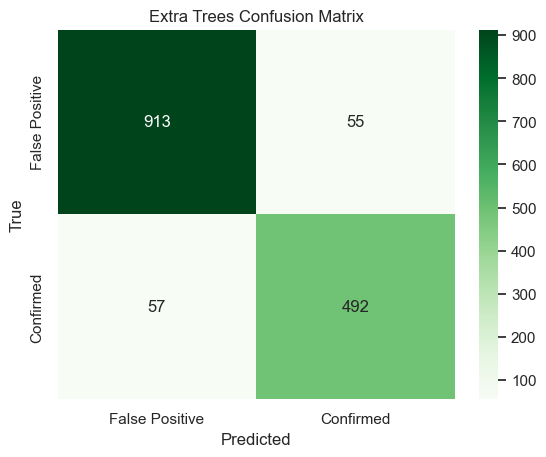

In [213]:
from sklearn.ensemble import  ExtraTreesClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import seaborn as sns
# import matplotlib.pyplot as plt


# 🌳 Extra Trees (a stronger variant)
et = ExtraTreesClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

print("\n🧾 Extra Trees Report:")
print(classification_report(y_test, y_pred_et))
print("Accuracy:", accuracy_score(y_test, y_pred_et))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_et)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.title('Extra Trees Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
